In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
from colicoords.cnn.unet import get_unet_256
from colicoords.cnn.preprocess import resize_stack, norm_hampel
from colicoords import iter_subplots
import numpy as np
import tifffile
import os

Using TensorFlow backend.


In [5]:
wts_pth = r'H:\_processed_data\2019\20190514_yichen_various_segmentation\wts_output\wts_bf_50-0.035334_iter4.h5'
input_pth = r'F:\_processed_big\t3ss\20191001_deltaescv_c41_eyfp-escv_repeat_02'

In [3]:
def process_stack(model, arr):
    resized = resize_stack(arr, 0.5)
    norm = np.stack([norm_hampel(a) for a in resized])
    prediction = model.predict(np.expand_dims(norm, -1))
    
    predict_resized = resize_stack(prediction.squeeze(), 2)
    out_binary = (predict_resized > 0.5).astype(int)
        
    return out_binary

In [6]:
model = get_unet_256(input_shape=(256, 256, 1))
model.load_weights(wts_pth)

In [8]:
c41_bf = np.load(os.path.join(input_pth, 'BF_C41_flat.npy'))

In [9]:
binary = process_stack(model, c41_bf)

<IPython.core.display.Javascript object>


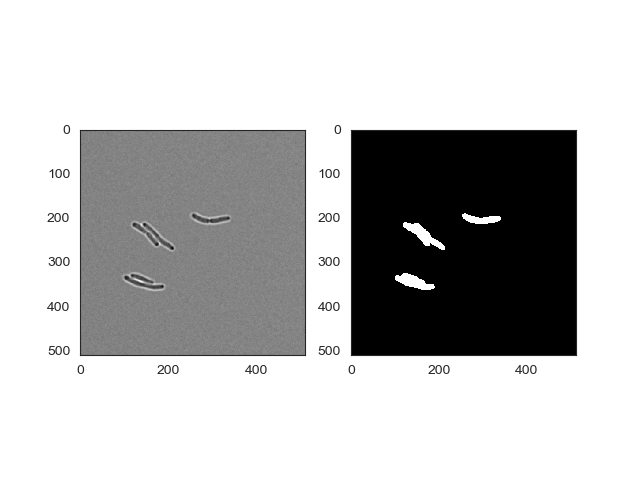

In [10]:
fig, (ax1, ax2) = iter_subplots(1, 2)
ax1.iter_imshow(c41_bf, cmap='gray')
ax2.iter_imshow(binary, cmap='gray')
fig.display()

In [11]:
np.save(os.path.join(input_pth, 'c41_segmented.npy'), binary)

In [12]:
epec_bf = np.load(os.path.join(input_pth, 'BF_EPEC_flat.npy'))

In [13]:
binary = process_stack(model, epec_bf)

<IPython.core.display.Javascript object>


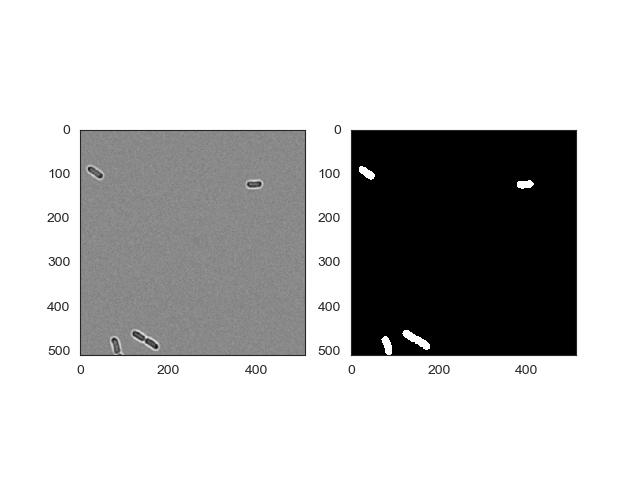

In [14]:
fig, (ax1, ax2) = iter_subplots(1, 2)
ax1.iter_imshow(epec_bf, cmap='gray')
ax2.iter_imshow(binary, cmap='gray')
fig.display()

In [15]:
np.save(os.path.join(input_pth, 'epec_segmented.npy'), binary)